In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("D:/ffff/Weather Data.csv")
df.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [9]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [11]:
df.shape

(8784, 8)

In [13]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

-- What are the unique weather conditions recorded?

In [15]:
df['Weather'].value_counts()


Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

-- Converting ‘Date/Time’ column to datetime format.

In [23]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Year'] = df['Date/Time'].dt.year
df['Month'] = df['Date/Time'].dt.month

-- Average temperature per weather condition.

In [35]:
df.groupby('Weather')['Temp_C'].mean().sort_values(ascending = False)

Weather
Thunderstorms                              24.150000
Thunderstorms,Rain Showers,Fog             21.600000
Thunderstorms,Rain,Fog                     20.600000
Thunderstorms,Rain                         20.433333
Thunderstorms,Rain Showers                 20.037500
Thunderstorms,Moderate Rain Showers,Fog    19.600000
Rain Showers                               13.722340
Rain Showers,Fog                           12.800000
Mainly Clear                               12.558927
Thunderstorms,Heavy Rain Showers           10.900000
Mostly Cloudy                              10.574287
Rain                                        9.786275
Rain,Fog                                    8.273276
Drizzle,Fog                                 8.067500
Cloudy                                      7.970544
Drizzle                                     7.353659
Clear                                       6.825716
Rain,Haze                                   4.633333
Fog                                   

In [33]:
df.head(1)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Year,Month
0,2012-01-01,-1.8,-3.9,86,4,8.0,101.24,Fog,2012,1


-- Maximum visibility for each weather type.

In [41]:
df.groupby('Weather')['Visibility_km'].max().head()

Weather
Clear                      48.3
Cloudy                     48.3
Drizzle                    25.0
Drizzle,Fog                 9.7
Drizzle,Ice Pellets,Fog     4.0
Name: Visibility_km, dtype: float64

-- How many times was weather exactly "Snow"?

In [45]:
df[df['Weather'] == 'Snow'].shape[0]

390

-- How many times temperature was above 20°C and visibility above 40km?

In [49]:
df[(df['Temp_C'] > 20) & (df['Visibility_km'] > 40)].shape[0]

753

In [57]:
def temp_category(temp):
    if temp >=25:
        return 'Hot'
    elif temp >=15:
        return 'Warm'
    elif temp >= 5:
        return 'Cool'
    else:
        return 'Cold'

df['temp_Category'] = df['Temp_C'].apply(temp_category)
df['temp_Category'].value_counts()

temp_Category
Cold    3513
Warm    2504
Cool    2126
Hot      641
Name: count, dtype: int64

-- Which month had the highest average temperature?

In [61]:
df.groupby('Month')['Temp_C'].mean().sort_values(ascending = False)

Month
7     22.790054
8     22.279301
6     20.134028
9     16.484444
5     16.237769
10    10.954973
4      7.009306
3      3.121237
11     0.931389
12    -3.306317
2     -4.225000
1     -7.371505
Name: Temp_C, dtype: float64

-- Plot a line graph of temperature over time (first 100 rows)

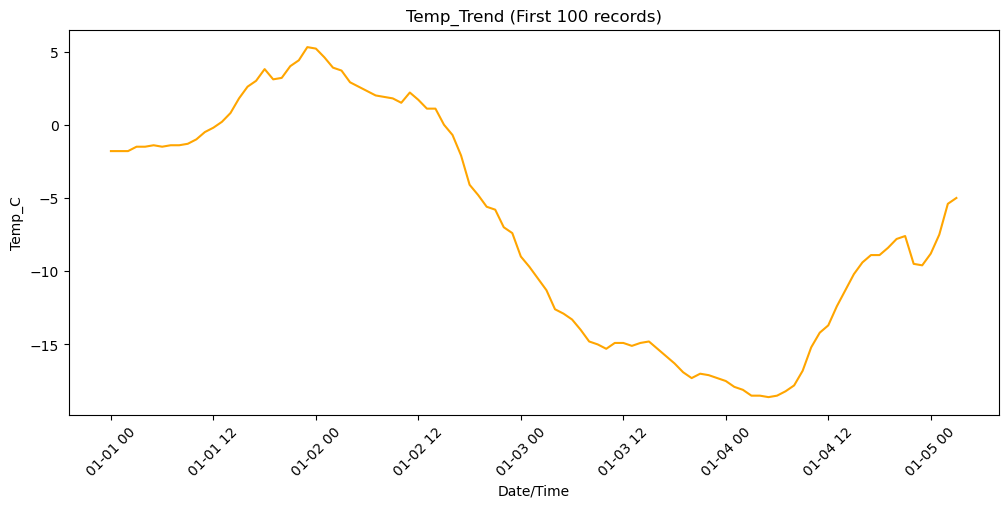

In [67]:
plt.figure(figsize= (12,5))
plt.plot(df['Date/Time'][:100], df['Temp_C'][:100], color = 'orange')
plt.xlabel('Date/Time')
plt.ylabel('Temp_C')
plt.title('Temp_Trend (First 100 records)')
plt.xticks(rotation = 45)
plt.show()


-- What’s the average pressure during clear weather only?

In [69]:
df.head(1)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Year,Month,temp_Category
0,2012-01-01,-1.8,-3.9,86,4,8.0,101.24,Fog,2012,1,Cold


In [71]:
df[df['Weather'] == 'Clear']['Press_kPa'].mean()

101.58744343891404

-- Which 3 weather conditions occur most frequently?

In [73]:
df['Weather'].value_counts().head(3)

Weather
Mainly Clear     2106
Mostly Cloudy    2069
Cloudy           1728
Name: count, dtype: int64

-- Temperature over Date

In [17]:
df.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog


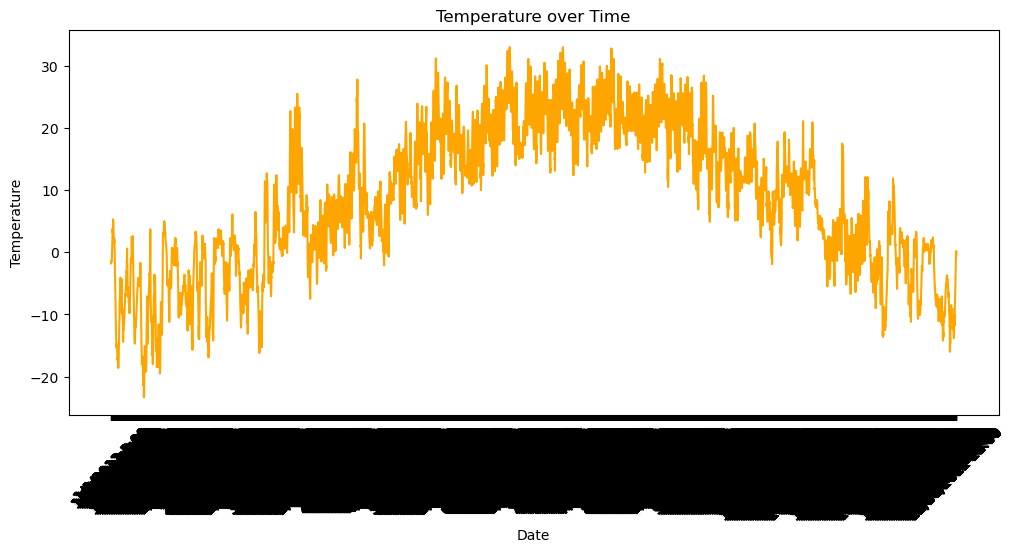

In [23]:
plt.figure(figsize=(12,5))
plt.plot(df['Date/Time'], df['Temp_C'], color = 'orange')
plt.title('Temperature over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation = 45)
plt.show()

--Average Wind Speed per Weather Type

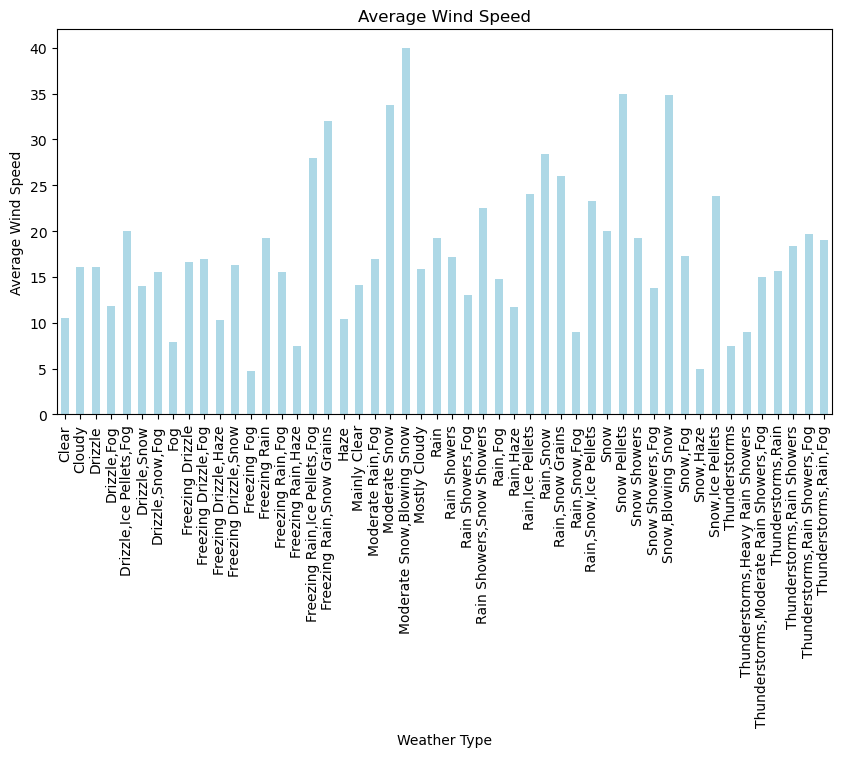

In [37]:
avg_wind = df.groupby('Weather')['Wind Speed_km/h'].mean()

plt.figure(figsize= (10,5))
avg_wind.plot(kind = 'bar', color = 'lightblue')
plt.title('Average Wind Speed')
plt.xlabel('Weather Type')
plt.ylabel('Average Wind Speed')
plt.show()

-- Pressure Distribution

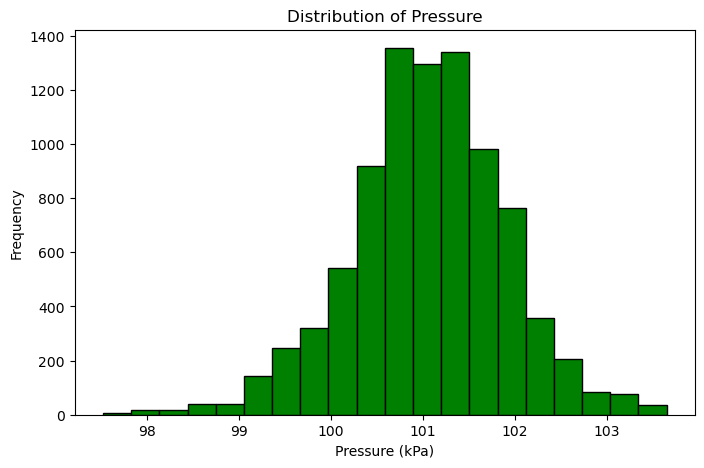

In [43]:
plt.figure(figsize= (8,5))
plt.hist(df['Press_kPa'], bins = 20, color = 'green', edgecolor = 'black')
plt.title('Distribution of Pressure')
plt.xlabel('Pressure (kPa)')
plt.ylabel('Frequency')
plt.show()

-- Temperature by Weather Type

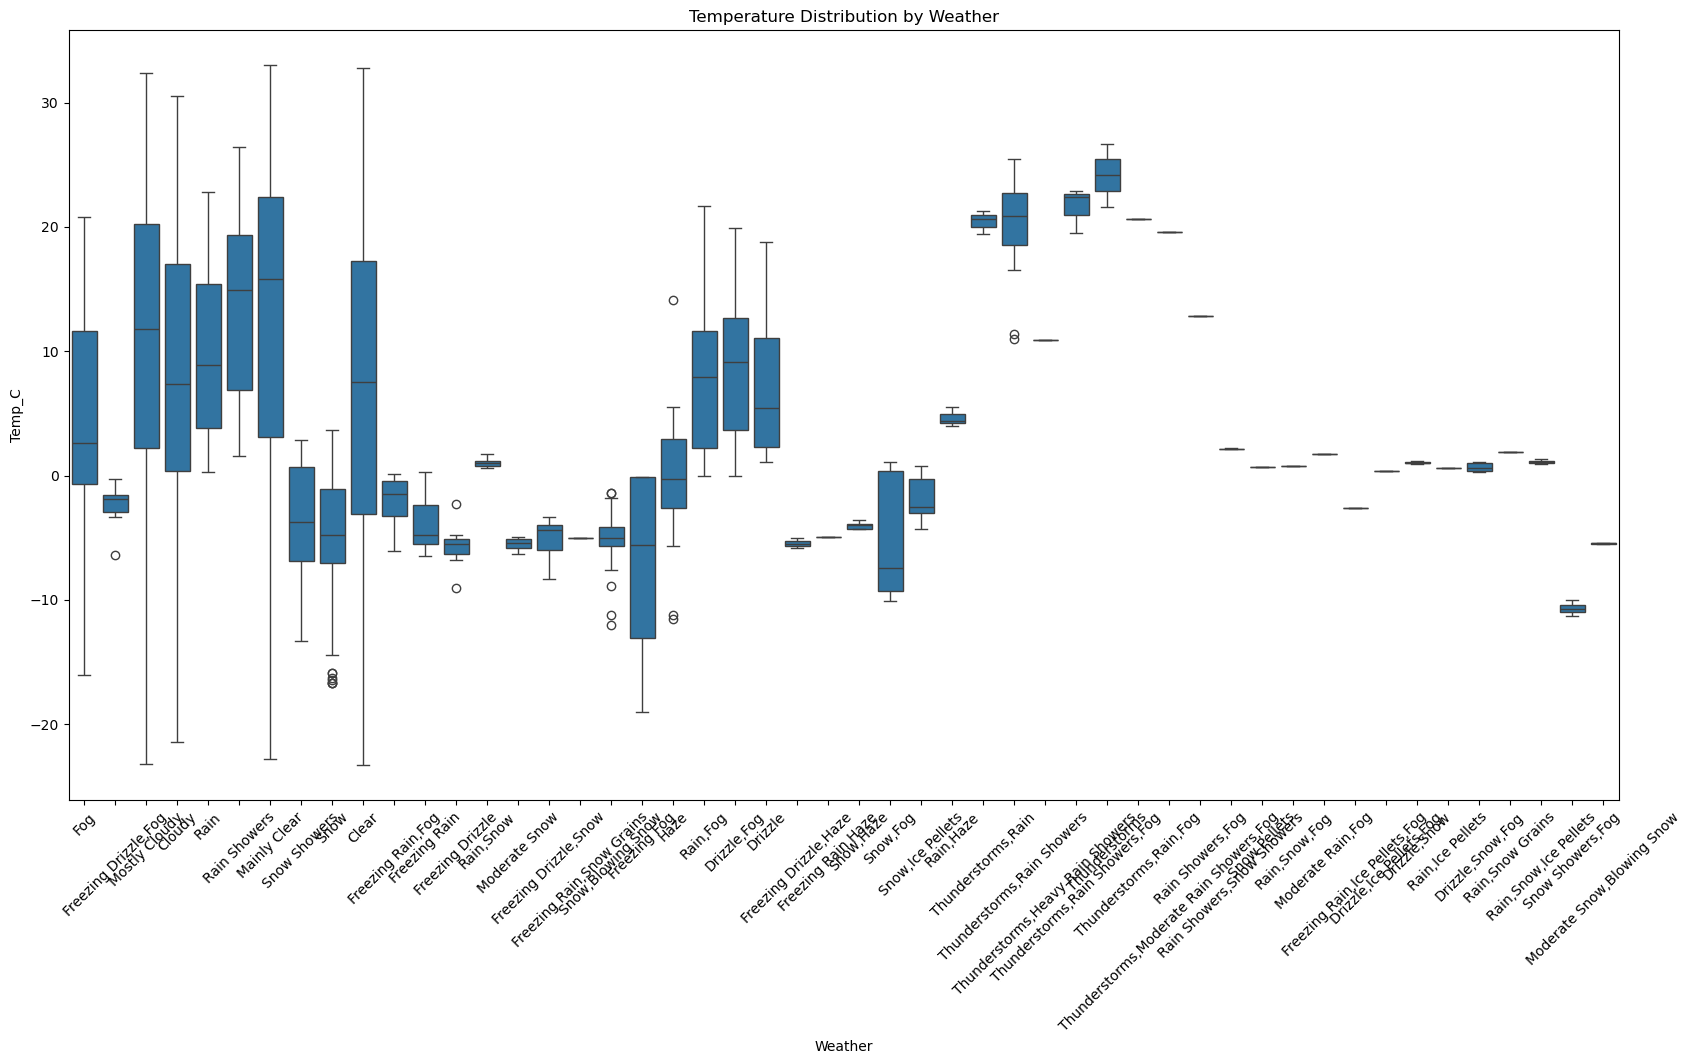

In [53]:
plt.figure(figsize = (20,10))
sns.boxplot(x = 'Weather', y= 'Temp_C', data = df)
plt.title('Temperature Distribution by Weather')
plt.xticks(rotation = 45)
plt.show()

-- Temperature Vs Wind Speed

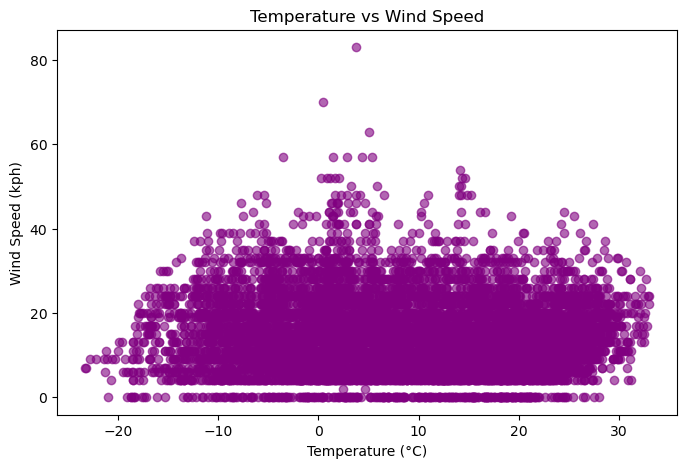

In [71]:
plt.figure(figsize = (8,5))
plt.scatter(df['Temp_C'], df['Wind Speed_km/h'], alpha = 0.6, color = 'purple')
plt.title('Temperature vs Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (kph)')
plt.show()